# utility NB for clustering lecture UI class 10
# FBB November 2015

In [1]:
__author__ = 'fbb'
%pylab inline
import numpy as np
import pylab as pl
#import kmseg
import sklearn.cluster
from sklearn import mixture
from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans2
import json
import os
s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python3.5/site-packages/matplotlib-2.0.0b4+2344.g7b27a1b-py3.5-macosx-10.6-x86_64.egg/matplotlib/__init__.py:910: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python3.5/site-packages/matplotlib-2.0.0b4+2344.g7b27a1b-py3.5-macosx-10.6-x86_64.egg/matplotlib/__init__.py:910: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Clustering for compressing and dimensionality reduction


## meet Akuma @akumadog

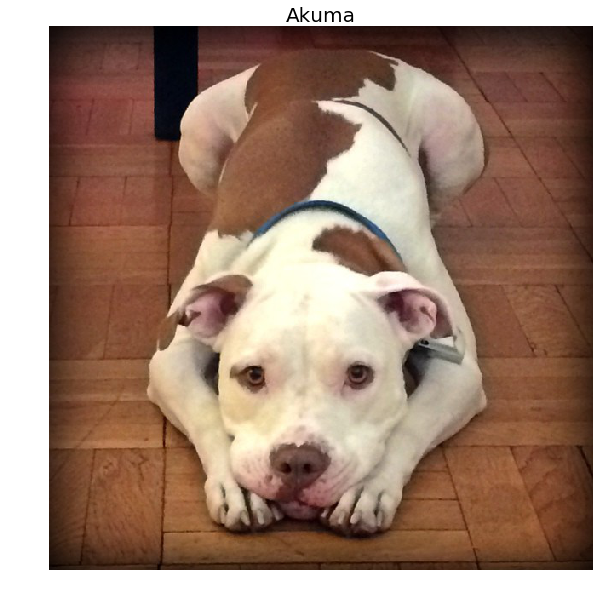

In [2]:
im = imread("10802534_761689917241346_821292660_n.jpg")
pl.figure(figsize=(10,10))
pl.imshow(im)
im.shape
red = im[:,:,0]
green = im[:,:,1]
blue = im[:,:,2]
pl.title("Akuma", fontsize=20)
pl.grid(False)
pl.axis('off')
pl.savefig("ak0.png")

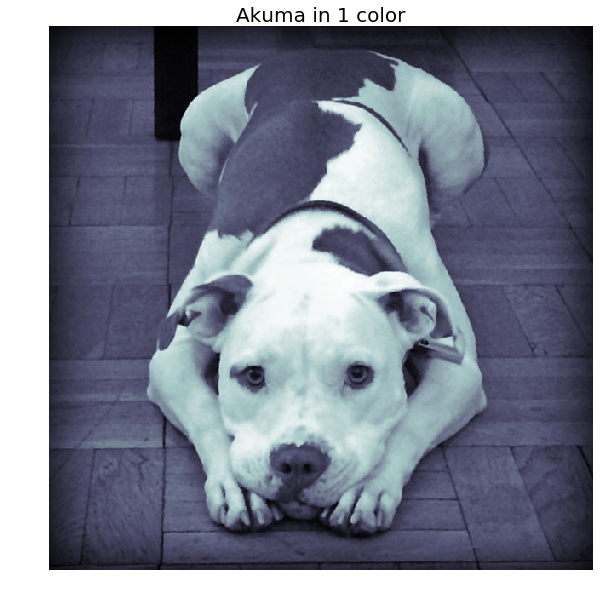

In [3]:
pl.figure(figsize=(10,10))


samples = np.column_stack([red.flatten(), green.flatten(), blue.flatten()])
pl.imshow(samples.mean(axis=1).reshape(red.shape), cmap='bone', interpolation='Nearest')
pl.title("Akuma in 1 color", fontsize=20)
pl.axis('off')
pl.savefig("ak1.png")

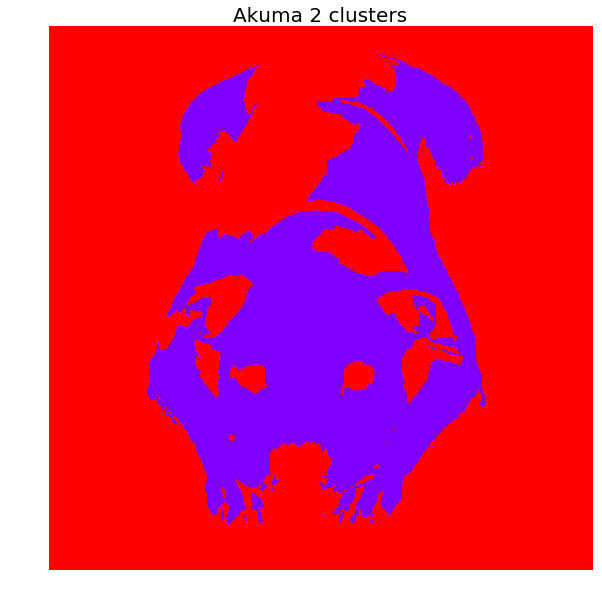

In [4]:
pl.figure(figsize=(10,10))


nc = 2
samples = np.column_stack([red.flatten(), green.flatten(), blue.flatten()])
clf = sklearn.cluster.KMeans(n_clusters=nc)
labels = clf.fit_predict(samples).reshape(red.shape)
pl.imshow(labels, cmap='rainbow', interpolation='Nearest')
pl.title("Akuma %d clusters"%nc, fontsize=20)
pl.axis('off')
pl.savefig("ak1.png")

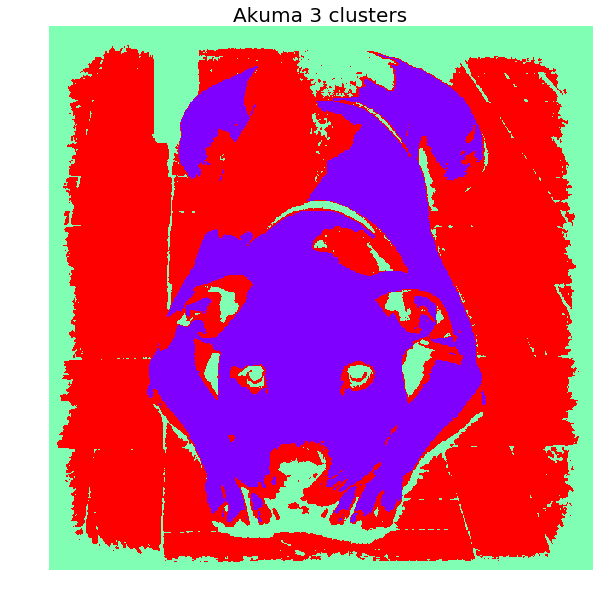

In [5]:
pl.figure(figsize=(10,10))


nc=3
samples = np.column_stack([red.flatten(), green.flatten(), blue.flatten()])
clf = sklearn.cluster.KMeans(n_clusters=nc)
labels = clf.fit_predict(samples).reshape(red.shape)
pl.imshow(labels, cmap='rainbow', interpolation='Nearest')
pl.title("Akuma %d clusters"%nc, fontsize=20)
pl.axis('off')
pl.savefig("ak2.png")

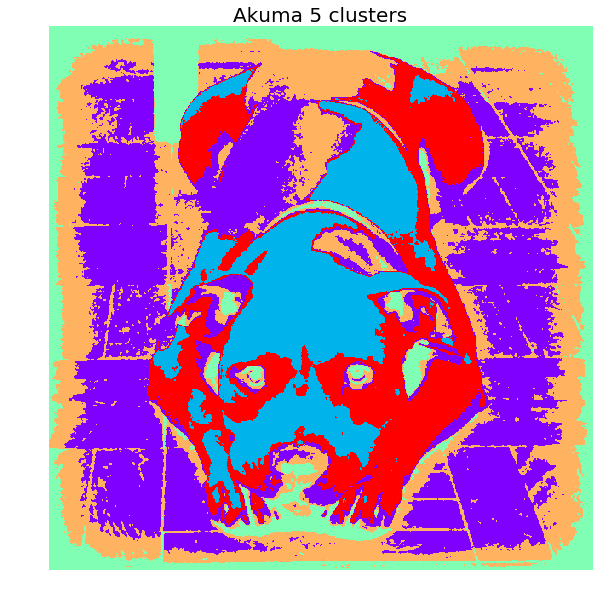

In [6]:
pl.figure(figsize=(10,10))


nc = 5
samples = np.column_stack([red.flatten(), green.flatten(), blue.flatten()])
clf = sklearn.cluster.KMeans(n_clusters=nc)
labels = clf.fit_predict(samples).reshape(red.shape)
pl.imshow(labels, cmap='rainbow', interpolation='Nearest')
pl.title("Akuma %d clusters"%nc, fontsize=20)
pl.axis('off')
pl.savefig("ak3.png")

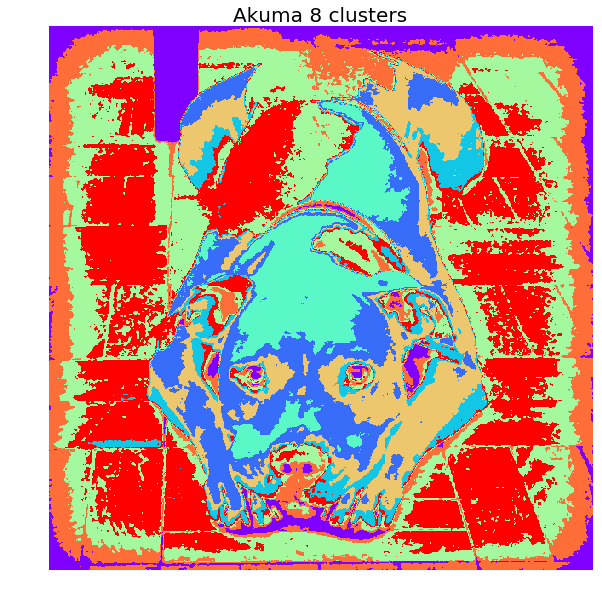

In [7]:
pl.figure(figsize=(10,10))
nc = 8
samples = np.column_stack([red.flatten(), green.flatten(), blue.flatten()])
clf = sklearn.cluster.KMeans(n_clusters=nc)
labels = clf.fit_predict(samples).reshape(red.shape)
pl.imshow(labels, cmap='rainbow', interpolation='Nearest')
pl.title("Akuma %d clusters"%nc, fontsize=20)
pl.axis('off')
pl.savefig("ak4.png")


In [9]:
#i am using subprocess to get the size of the files through a command line
#unlike os.system, which also runs command lines, subprocess allows one
#to capture the return output and errors of the command line 
#by piping stdoin, stdout, stderr
#!ls -l ak?.png
#os.system("ls -l ak.png")
from subprocess import Popen
from subprocess import PIPE
localpath = os.getcwd()
for i in range(5):
    p = Popen(['ls', '-lh', localpath+'/ak%d.png'%i], stdin=PIPE, stdout=PIPE, stderr=PIPE)
    output, err = p.communicate(b"size of images")
    print (output, err)

b'-rw-r--r--@ 1 fbianco  staff   382K Dec  8 18:15 /Users/fbianco/science/Dropbox/UI/notebooks/cluster/ak0.png\n' b''
b'-rw-r--r--@ 1 fbianco  staff    14K Dec  8 18:18 /Users/fbianco/science/Dropbox/UI/notebooks/cluster/ak1.png\n' b''
b'-rw-r--r--@ 1 fbianco  staff    24K Dec  8 18:18 /Users/fbianco/science/Dropbox/UI/notebooks/cluster/ak2.png\n' b''
b'-rw-r--r--@ 1 fbianco  staff    41K Dec  8 18:18 /Users/fbianco/science/Dropbox/UI/notebooks/cluster/ak3.png\n' b''
b'-rw-r--r--@ 1 fbianco  staff    57K Dec  8 18:19 /Users/fbianco/science/Dropbox/UI/notebooks/cluster/ak4.png\n' b''


## Urban images:  finding windows in the UO images

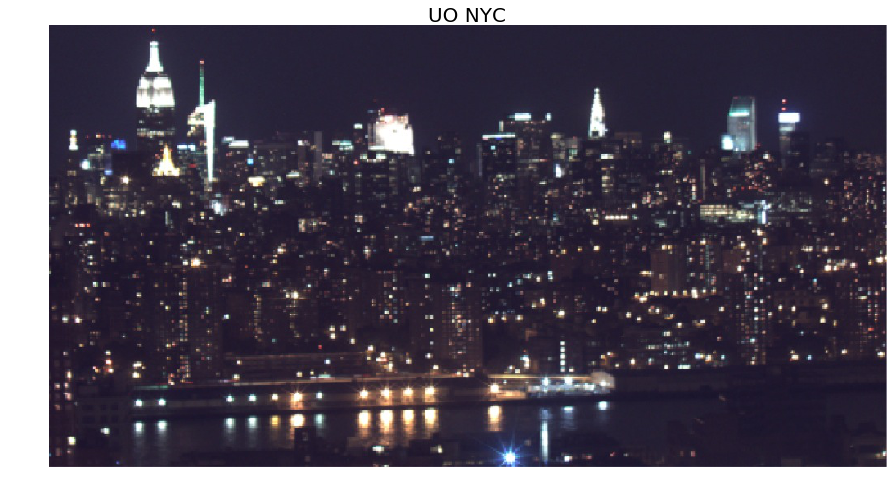

In [10]:
fig = pl.figure(figsize = (15,15))
im = imread("uo_img.jpg")
jpgfile = Image.open("uo_img.jpg")
col, row =  jpgfile.size
m = imread("uo_img.jpg")
pl.imshow(im)
pl.title("UO NYC", fontsize=20)
pl.axis('off')
red = im[:,:,0]
green = im[:,:,1]
blue = im[:,:,2]



Text(0.5,1,'UO NYC blue channel')

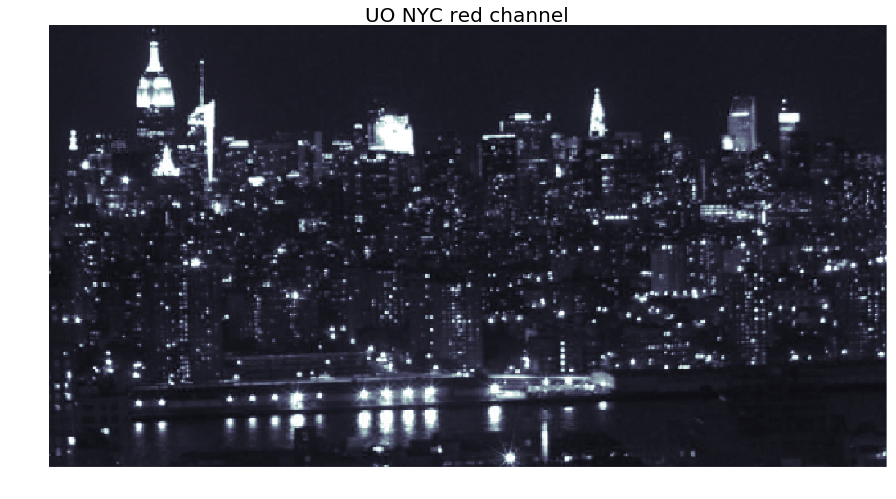

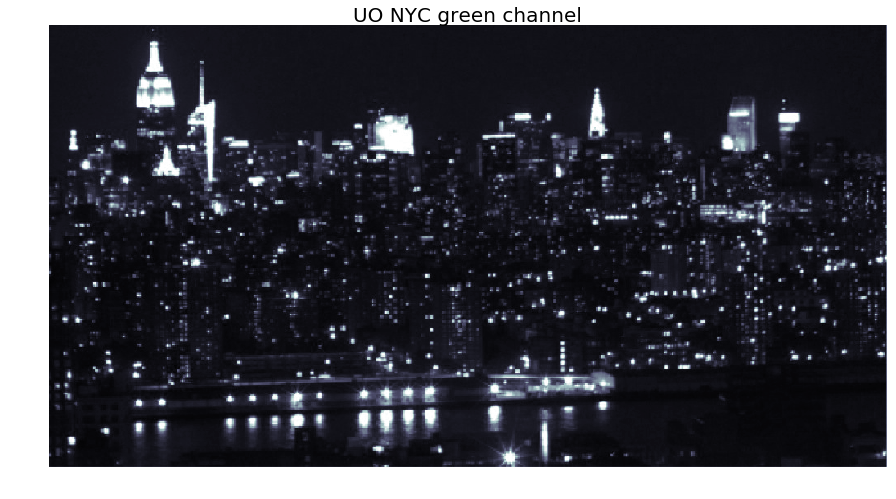

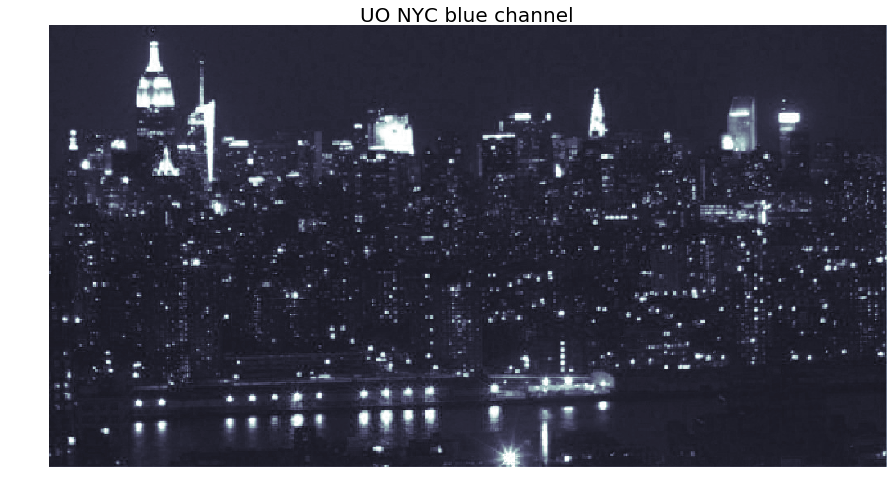

In [11]:
pl.figure(figsize = (15,15))
pl.imshow(red, cmap="bone")
pl.axis('off')
pl.title("UO NYC red channel", fontsize=20)
pl.figure(figsize = (15,15))
pl.imshow(green, cmap="bone")
pl.axis('off')
pl.title("UO NYC green channel", fontsize=20)
pl.figure(figsize = (15,15))
pl.imshow(blue, cmap="bone")
pl.axis('off')
pl.title("UO NYC blue channel", fontsize=20)




Text(0.5,1,'UO NYC 2 clusters')

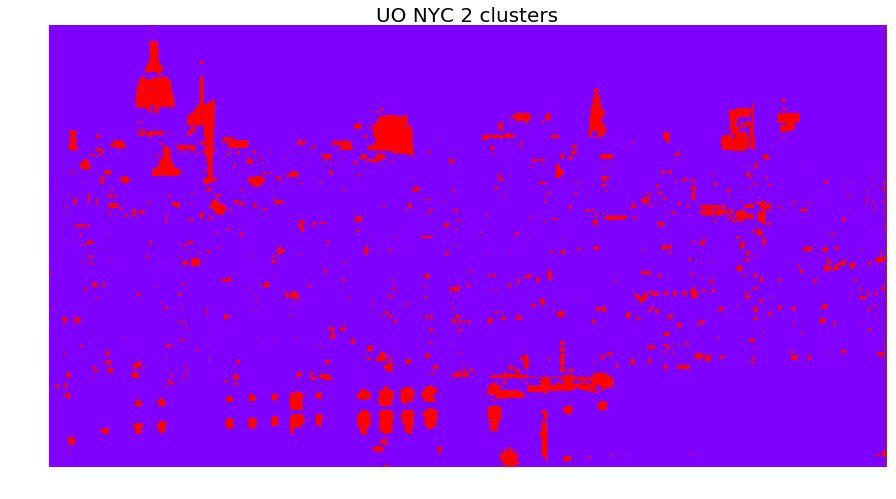

In [12]:

pl.figure(figsize = (15,15))

nc = 2
samples = np.column_stack([red.flatten(), green.flatten(), blue.flatten()])
clf = sklearn.cluster.KMeans(n_clusters=nc)
labels = clf.fit_predict(samples).reshape(red.shape)
pl.imshow(labels, cmap='rainbow', interpolation='Nearest')
pl.axis('off')
pl.title("UO NYC %d clusters"%nc, fontsize=20)



Text(0.5,1,'UO NYC 5 clusters')

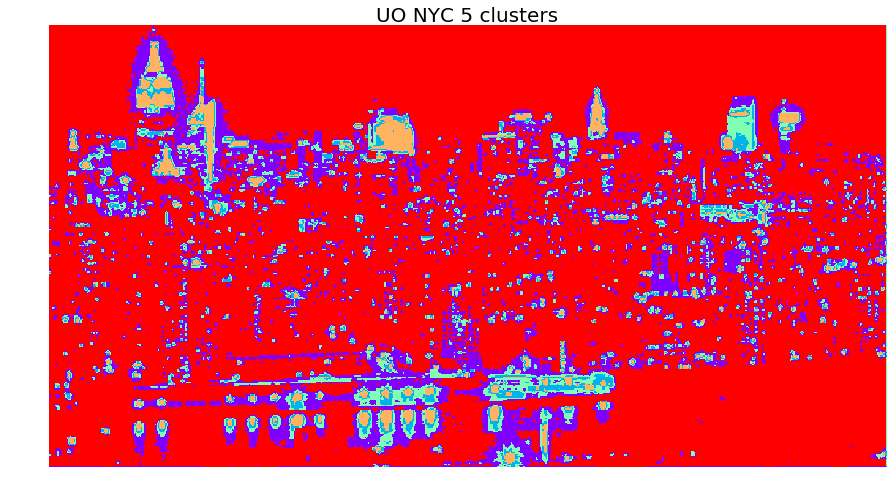

In [13]:
nc = 5
pl.figure(figsize = (15,15))
clf = sklearn.cluster.KMeans(n_clusters=nc)
labels = clf.fit_predict(samples).reshape(red.shape)

pl.imshow(labels, cmap='rainbow', interpolation='Nearest')
pl.axis('off')
pl.title("UO NYC %d clusters"%nc, fontsize=20)


Text(0.5,1,'UO NYC 10 clusters')

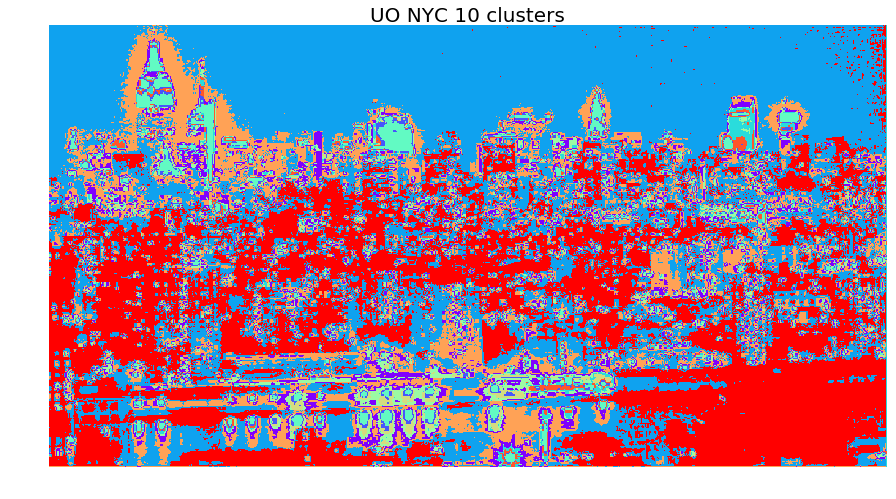

In [14]:
nc = 10
pl.figure(figsize = (15,15))
clf = sklearn.cluster.KMeans(n_clusters=nc)
labels = clf.fit_predict(samples).reshape(red.shape)
pl.imshow(labels, cmap='rainbow', interpolation='Nearest')
pl.axis('off')
pl.title("UO NYC %d clusters"%nc, fontsize=20)
